In [45]:
from google.colab import files
uploaded = files.upload()

Saving dataset_cleaned.csv to dataset_cleaned.csv


###Data Understanding###

In [46]:
import pandas as pd

# Load data
df = pd.read_csv('dataset_cleaned.csv')

# Ukuran dan kolom
print("Ukuran dataset:", df.shape)
print("Kolom:", df.columns.tolist())

# Distribusi label
print("Distribusi target:\n", df['target'].value_counts())

# Lihat beberapa baris awal
print(df.head())


Ukuran dataset: (4475, 11)
Kolom: ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'target']
Distribusi target:
 target
1    2569
0    1906
Name: count, dtype: int64
    col1   col2   col3   col4   col5   col6   col7   col8   col9  col10  \
0  38.29  38.29  38.29  38.29  38.29  38.29  38.66  38.66  38.66  38.66   
1  39.03  38.66  39.03  39.03  39.03  39.03  39.03  39.03  39.03  39.03   
2  39.41  39.41  39.41  39.41  39.41  39.41  39.78  39.41  39.78  39.78   
3  39.78  39.78  39.78  39.78  40.15  40.15  40.15  40.15  40.15  40.15   
4  40.52  40.52  40.52  40.52  40.52  40.52  40.52  40.52  40.52  40.52   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


###EDA###

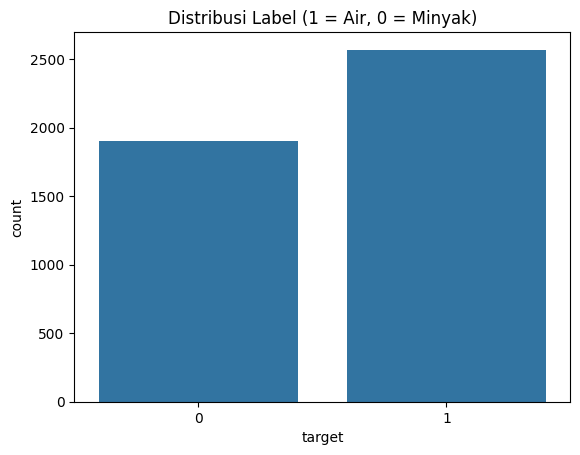

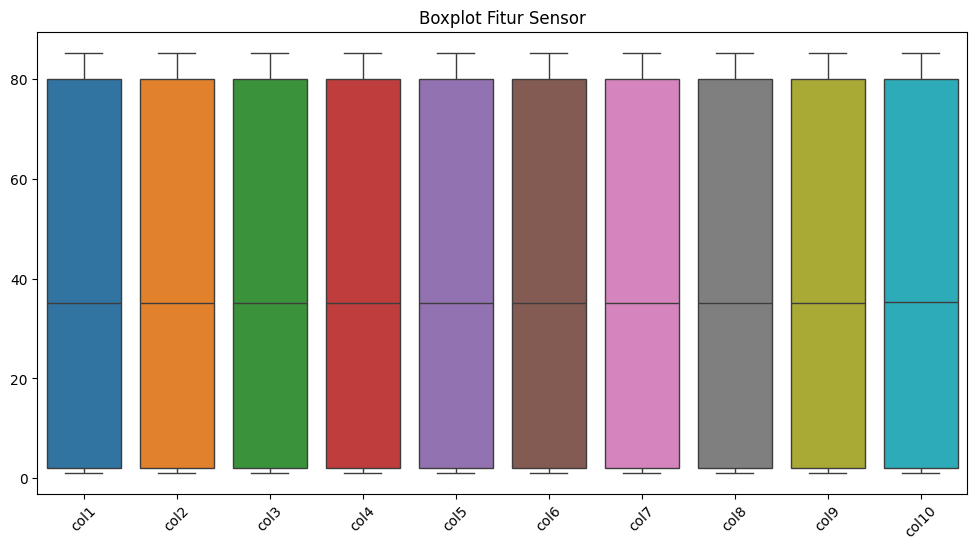

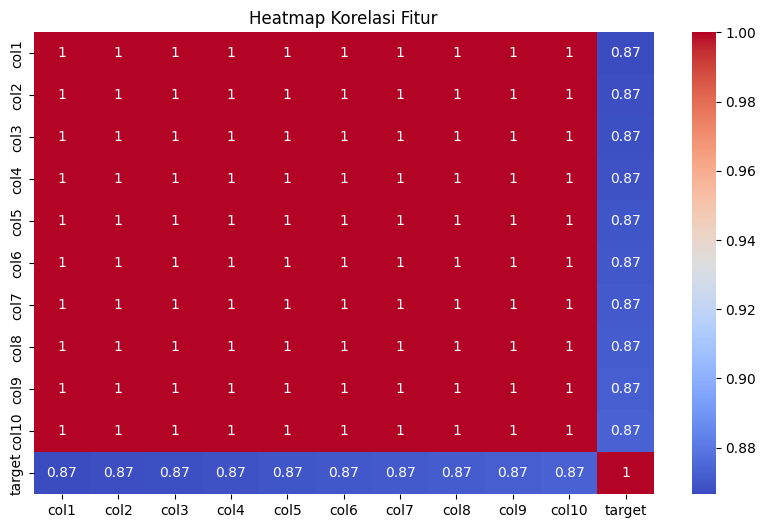

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi target
sns.countplot(x='target', data=df)
plt.title("Distribusi Label (1 = Air, 0 = Minyak)")
plt.show()

# Boxplot fitur
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns='target'))
plt.title("Boxplot Fitur Sensor")
plt.xticks(rotation=45)
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur")
plt.show()


###Data Preparation###

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisah fitur dan label
X = df.drop('target', axis=1)
y = df['target']

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test :", X_test.shape)


Ukuran X_train: (3580, 10)
Ukuran X_test : (895, 10)


###Modelling###

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi dan latih model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Simpan model (jika ingin digunakan ulang)
import joblib
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Buat dan latih model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

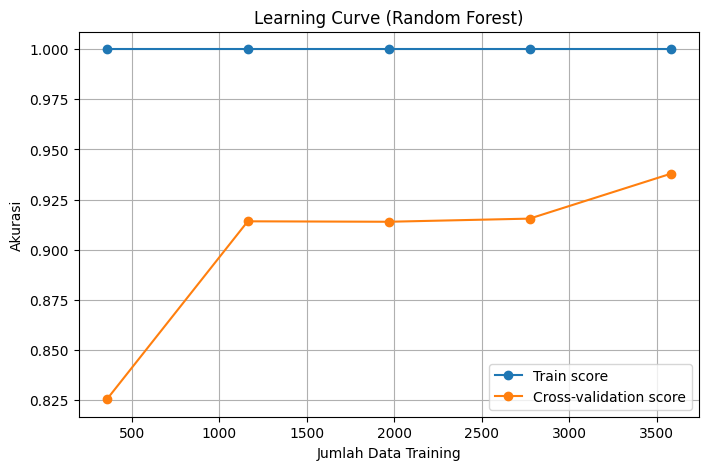

In [57]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_scaled, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Train score')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score')
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Jumlah Data Training")
plt.ylabel("Akurasi")
plt.legend(loc="best")
plt.grid(True)
plt.show()


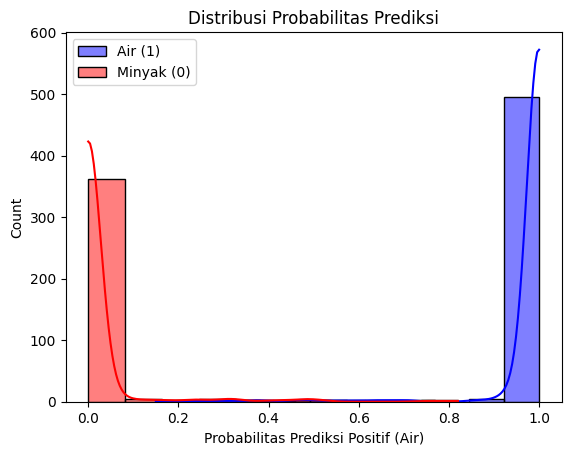

In [56]:
sns.histplot(y_prob[y_test == 1], color='blue', label='Air (1)', kde=True)
sns.histplot(y_prob[y_test == 0], color='red', label='Minyak (0)', kde=True)
plt.title("Distribusi Probabilitas Prediksi")
plt.xlabel("Probabilitas Prediksi Positif (Air)")
plt.legend()
plt.show()


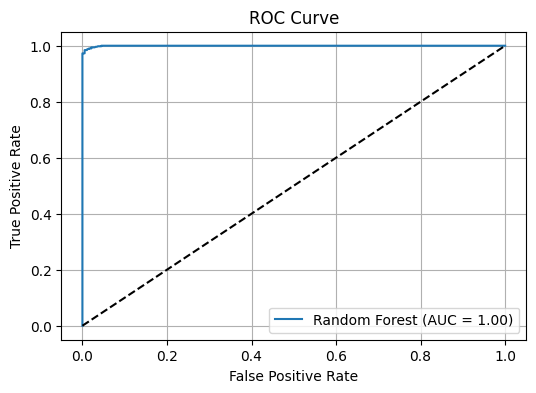

In [54]:
from sklearn.metrics import roc_curve, auc

# Dapatkan probabilitas prediksi
y_prob = model.predict_proba(X_test)[:, 1]

# Hitung ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Random Forest (AUC = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


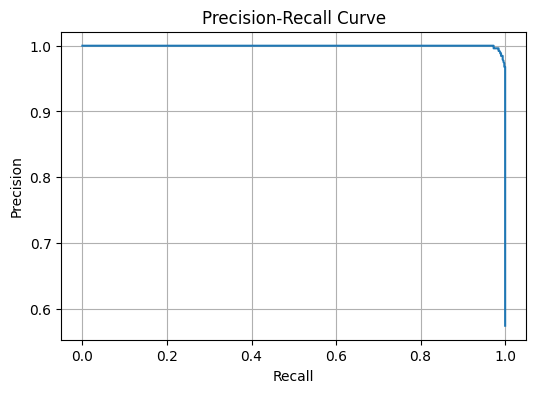

In [55]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


###Evaluation###

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       381
           1       0.99      0.98      0.99       514

    accuracy                           0.99       895
   macro avg       0.99      0.99      0.99       895
weighted avg       0.99      0.99      0.99       895

Accuracy : 0.9877094972067039
Precision: 0.9941060903732809
Recall   : 0.9844357976653697
F1-Score : 0.989247311827957


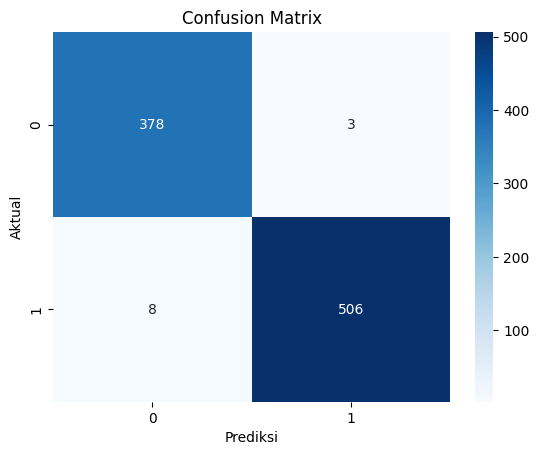

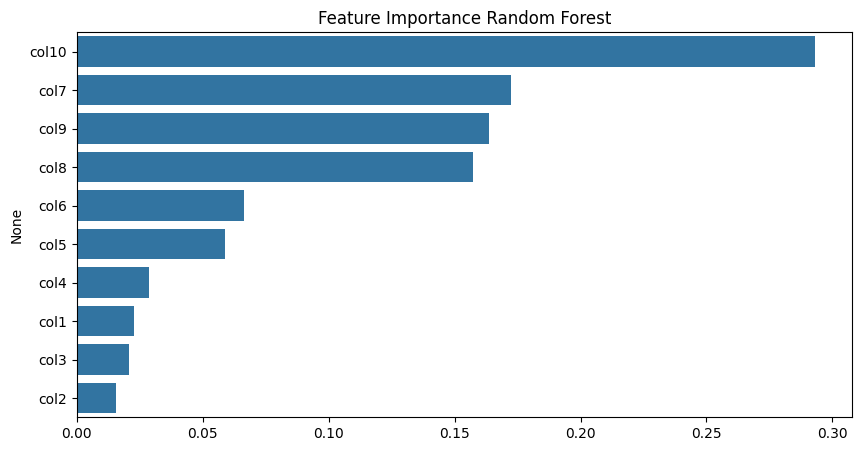

In [50]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi metrik
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance Random Forest")
plt.show()
